# Average House Sale Prices forecast in Middlesex

This can be used as pipeline to forecast the median and average sale prices.
- Libraries used: pandas for dataframe
- Prophet from Facebook is used as a model to forecast the data.

In [25]:
#importing libraries

In [26]:
import pandas as pd
from prophet import Prophet

In [27]:
#ignoring the warnings occured during fitting the model

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
#Reading the data frame

In [30]:
data_frame=pd.read_csv('Middlesex.csv')

In [31]:
county_name=data_frame['County'].value_counts().index[0]

In [32]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price,County
0,2001-01-01,226616.22,255603.52,Middlesex
1,2001-02-01,197721.50,242720.47,Middlesex
2,2001-03-01,241828.60,247683.62,Middlesex
3,2001-04-01,228140.19,256499.82,Middlesex
4,2001-05-01,227988.10,252791.58,Middlesex


- Since the 'Date' feature is of object dtype. So, we need to convert that to date format
- Dropping the 'County' feature as it is no longer required

In [33]:
data_frame['Date']=pd.to_datetime(data_frame['Date'],format='%Y/%m/%d')
data_frame.drop(['County'],axis=1,inplace=True)

In [34]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,226616.22,255603.52
1,2001-02-01,197721.50,242720.47
2,2001-03-01,241828.60,247683.62
3,2001-04-01,228140.19,256499.82
4,2001-05-01,227988.10,252791.58


Extracting only Median Sale Price as a dataframe by removing Median Sale Price feature

In [35]:
average_data=data_frame.drop(['Median Sale Price'],axis=1)

## Forecasting average_data

In [36]:
average_data.head()

,Date,Average Sale Price
0,2001-01-01,255603.52
1,2001-02-01,242720.47
2,2001-03-01,247683.62
3,2001-04-01,256499.82
4,2001-05-01,252791.58


### Changing the column names as 'ds' for 'Date' and 'y' for 'Median Sale Price'

In [37]:
average_data.columns=['ds','y']

In [38]:
average_data

,ds,y
0,2001-01-01,255603.52
1,2001-02-01,242720.47
2,2001-03-01,247683.62
3,2001-04-01,256499.82
4,2001-05-01,252791.58
...,...,...
245,2021-06-01,329563.02
246,2021-07-01,338800.46
247,2021-08-01,356656.72
248,2021-09-01,356580.34


In [39]:
#Initializing the Prophet model as m
m = Prophet()
#Fitting the model
m.fit(average_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
#creating the data frame with the next 24 months in 'ds'(Date)
future = m.make_future_dataframe(periods=24,freq='M')
future

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
269,2023-05-31
270,2023-06-30
271,2023-07-31
272,2023-08-31


## Predicting the values for the new future dates.

In [41]:
forecast = m.predict(future)
#calling the dataframe with 'ds','yhat,'yhat_lower','yhat_upper' features
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2023-05-31,360642.479629,328087.931642,390935.455827
270,2023-06-30,336375.767309,305709.408326,369025.941128
271,2023-07-31,354456.038350,324773.927511,388824.538857
272,2023-08-31,345522.428839,313638.072032,375543.609196
273,2023-09-30,335494.326941,302876.854607,369611.789940


Calling the forecast dataframe which contains the predicted values along with the actual values

In [42]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,270777.136806,213708.581541,276227.001573,270777.136806,270777.136806,-25786.207552,-25786.207552,-25786.207552,-25786.207552,-25786.207552,-25786.207552,0.0,0.0,0.0,244990.929255
1,2001-02-01,272926.589521,219472.969850,282087.672395,272926.589521,272926.589521,-21991.306814,-21991.306814,-21991.306814,-21991.306814,-21991.306814,-21991.306814,0.0,0.0,0.0,250935.282706
2,2001-03-01,274868.030682,220947.579977,282355.250145,274868.030682,274868.030682,-22156.847174,-22156.847174,-22156.847174,-22156.847174,-22156.847174,-22156.847174,0.0,0.0,0.0,252711.183508
3,2001-04-01,277017.483397,232081.056357,297261.973967,277017.483397,277017.483397,-11061.728098,-11061.728098,-11061.728098,-11061.728098,-11061.728098,-11061.728098,0.0,0.0,0.0,265955.755298
4,2001-05-01,279097.598927,246612.050405,307636.614976,279097.598927,279097.598927,-521.542760,-521.542760,-521.542760,-521.542760,-521.542760,-521.542760,0.0,0.0,0.0,278576.056166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2023-05-31,335508.000677,328087.931642,390935.455827,330607.202937,339725.057727,25134.478952,25134.478952,25134.478952,25134.478952,25134.478952,25134.478952,0.0,0.0,0.0,360642.479629
270,2023-06-30,336076.985014,305709.408326,369025.941128,330829.482673,340799.856142,298.782295,298.782295,298.782295,298.782295,298.782295,298.782295,0.0,0.0,0.0,336375.767309
271,2023-07-31,336664.935495,324773.927511,388824.538857,331041.151429,341959.676664,17791.102855,17791.102855,17791.102855,17791.102855,17791.102855,17791.102855,0.0,0.0,0.0,354456.038350
272,2023-08-31,337252.885977,313638.072032,375543.609196,331209.785922,342935.211684,8269.542862,8269.542862,8269.542862,8269.542862,8269.542862,8269.542862,0.0,0.0,0.0,345522.428839


## Plotting the forecast data

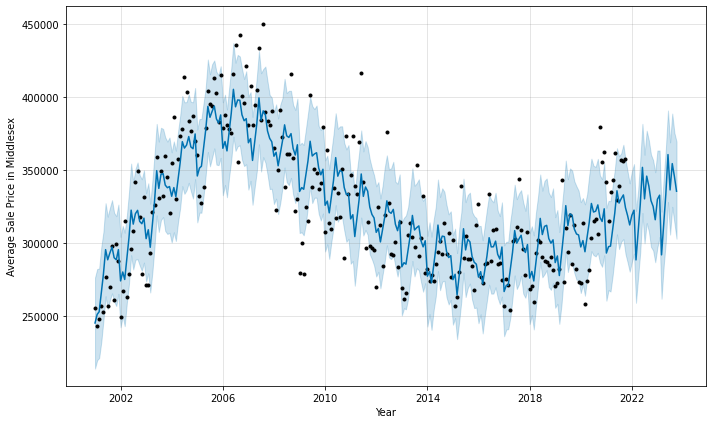

In [43]:
fig1 = m.plot(forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

## Plotting components of forecast data

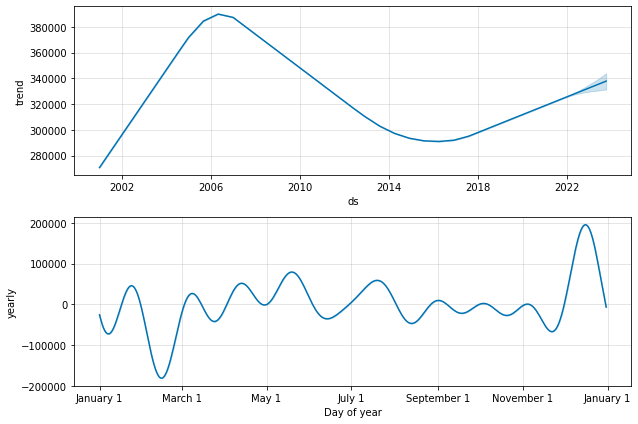

In [44]:
fig2 = m.plot_components(forecast)

## Plotting the final figure using prophet model and forecast data

In [45]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

The black dots represents the actual values and the blue line which has a point straight to the black dot is the predicted value.

## Plotting the trend and yearly data

In [46]:
plot_components_plotly(m, forecast)

## Performing cross_validation to check the accuracy

In [47]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 37 forecasts with cutoffs between 2003-01-04 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/37 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


## Exploring the metrics using performance_metrics from prophet.diagnostics(module used to supervise the model)

In [48]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,1.133815e+09,33672.168821,26120.320276,0.076403,0.052779,0.077861,0.636364
1,40 days,1.021774e+09,31965.202610,24618.385925,0.072854,0.048906,0.073846,0.681818
2,42 days,1.004375e+09,31691.873669,24130.980234,0.071342,0.047778,0.072430,0.681818
3,44 days,1.017669e+09,31900.925453,24295.384801,0.072187,0.048906,0.073118,0.681818
4,45 days,1.155333e+09,33990.195070,25972.150384,0.077192,0.055391,0.077725,0.659091


In [49]:
for err,horizon in zip(df_p['mape'],df_p['horizon']):
    #finding the accuracy by taking off the err(mape) value from 100(percentage)
    accuracy=100-err
    print('Horizon: {}, Accuracy: {}%'.format(horizon,accuracy))

Horizon: 39 days 00:00:00, Accuracy: 99.92359685808958%
Horizon: 40 days 00:00:00, Accuracy: 99.92714644470865%
Horizon: 42 days 00:00:00, Accuracy: 99.9286575287668%
Horizon: 44 days 00:00:00, Accuracy: 99.92781259243158%
Horizon: 45 days 00:00:00, Accuracy: 99.92280830645082%
Horizon: 46 days 00:00:00, Accuracy: 99.92452642935848%
Horizon: 47 days 00:00:00, Accuracy: 99.92651572740726%
Horizon: 49 days 00:00:00, Accuracy: 99.92835364764484%
Horizon: 50 days 00:00:00, Accuracy: 99.93022267657155%
Horizon: 51 days 00:00:00, Accuracy: 99.93010128384302%
Horizon: 52 days 00:00:00, Accuracy: 99.93225388538659%
Horizon: 54 days 00:00:00, Accuracy: 99.92779348831276%
Horizon: 55 days 00:00:00, Accuracy: 99.92753002733747%
Horizon: 56 days 00:00:00, Accuracy: 99.92109803126792%
Horizon: 58 days 00:00:00, Accuracy: 99.92224293062564%
Horizon: 60 days 00:00:00, Accuracy: 99.91939393139529%
Horizon: 61 days 00:00:00, Accuracy: 99.91643913662683%
Horizon: 62 days 00:00:00, Accuracy: 99.918992888

All the values with horizon(days) got predicted well with a min of 99% accuracy

## Plotting the mape and Horizon(days) to see the metrics from cross_validation 

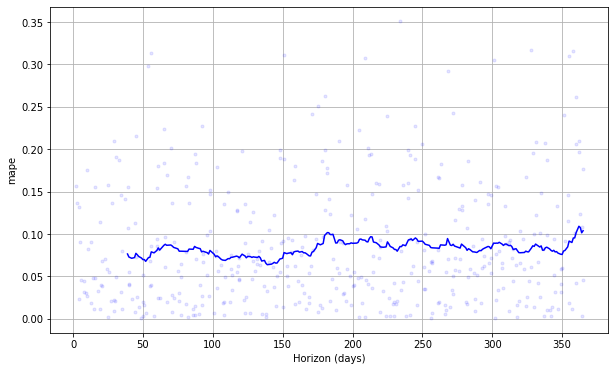

In [50]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

We can see that mape is too low when the Horizon(days) is between 130-140.

### Saving the Prophet model by dumping the model as pickle file for future usage

In [51]:
import pickle

In [52]:
with open(county_name+'_prophet_model_for_average_sale_price.pkl','wb') as file:
    pickle.dump(m,file)